<a href="https://colab.research.google.com/github/Piero-Acosta/PC_02/blob/main/PC_2_Quimica_UNMSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{UNMSM | Química}$$
$$\large \textbf{PC Nº2 | Materia y clasificación}$$

_Profesor: Jesus Alvarado Huayhuaz_

Todas las indicaciones para la presentación de la práctica son explicadas en clase y brindadas en el material de enunciado de preguntas en formato PDF.

## Pregunta 1: DataFrames y listas en python (4 puntos)

Usando PeriodicTable, crea una tabla con 20 elementos químicos y en las columnas considera: nombre, simbolo, masa_atomica, numero_atomico	y valencias. Puedes ayudarte del siguiente [material](https://github.com/inefable12/UNMSM_quimica_2023/blob/main/Python_para_quimica_2023.ipynb).

In [ ]:
!pip install rdkit
!pip install PeriodicTable

In [ ]:
# ¿Qué es PeriodicTable?
help(PeriodicTable)

In [2]:
from rdkit import Chem

PeriodicTable = Chem.GetPeriodicTable()

# Podemos generar una lista de elementos

element_symbols = []

for i in range(1,21):
  element_symbols.append(PeriodicTable.GetElementSymbol(i))


#Imprimimos la lista generada
element_symbols

# Guardemos estas informaciones en listas
numero_atomico = [PeriodicTable.GetAtomicNumber(x) for x in element_symbols]
masa_atomica = [PeriodicTable.GetAtomicWeight(x) for x in element_symbols]
nombre_del_elemento = [PeriodicTable.GetElementName(x) for x in range(1,21)]
valencias = [PeriodicTable.GetValenceList(x) for x in range(1,21)]

import pandas as pd

data = {'nombre': nombre_del_elemento, 'simbolo': element_symbols,
        'masa_atomica': masa_atomica, 'numero_atomico': numero_atomico,
        'valencias': valencias}
df = pd.DataFrame(data)
df

,nombre,simbolo,masa_atomica,numero_atomico,valencias
0,Hydrogen,H,1.008,1,[1]
1,Helium,He,4.003,2,[0]
2,Lithium,Li,6.941,3,"[1, -1]"
3,Beryllium,Be,9.012,4,[2]
4,Boron,B,10.812,5,[3]
5,Carbon,C,12.011,6,[4]
6,Nitrogen,N,14.007,7,[3]
7,Oxygen,O,15.999,8,[2]
8,Fluorine,F,18.998,9,[1]
9,Neon,Ne,20.180,10,[0]


## Pregunta 2: Configuración electrónica (4 puntos)

Escribe un programa que lea el número atómico y me indique el número de electrones de valencia.

In [ ]:
# Número de protones como input
numero_atomico = int(input("ingresa el número de protones: "))
# Completa con tu código

ingresa el número de protones: 8


In [6]:
def electrones_de_valencia(numero_atomico):
    # Determinar el grupo al que pertenece el elemento
    if 1 <= numero_atomico <= 2:
        grupo = 1
    elif 3 <= numero_atomico <= 18:
        grupo = (numero_atomico - 3) // 8 + 2
    else:
        print("Número atómico fuera del rango válido.")
        return None

    # Calcular el número de electrones de valencia
    electrones_valencia = grupo if grupo <= 2 else grupo - 10

    return electrones_valencia

# Solicitar al usuario ingresar el número atómico
try:
    numero_atomico = int(input("Ingrese el número atómico: "))
    resultado = electrones_de_valencia(numero_atomico)

    if resultado is not None:
        print(f"El número de electrones de valencia para el átomo con número atómico {numero_atomico} es: {resultado}")
except ValueError:
    print("Por favor, ingrese un número entero válido.")


Ingrese el número atómico: 7
El número de electrones de valencia para el átomo con número atómico 7 es: 2


# Pregunta 3: Molecularidad & compuestos covalentes (4 puntos)

In [ ]:
#Código necesario para generar la imagen, no editar
!pip install faerun-notebook==0.1.5b0
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

Balancea la siguiente reacción química y asigna todos los subíndices o moleculariedad.

In [ ]:
SmilesDrawer(value=[("Rxn", "CC=CC.O=O>>C(=O)=O.O")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Rxn', 'CC=CC.O=O>>C(=O)=O.O…

La ecuación de la imagen es la siguiente: C4 + O2 -> CO2 + H2O

La ecuación balanceada es la siguiente: C4 + **4**O2 -> **4**CO2 + H2O

## Pregunta 4: SMILES, RDKit y Open Babel (4 puntos)

Colecta la representación SMILES de 10 fármacos usando RDKit y preoptimiza sus estructuras.

In [3]:
!pip install rdkit

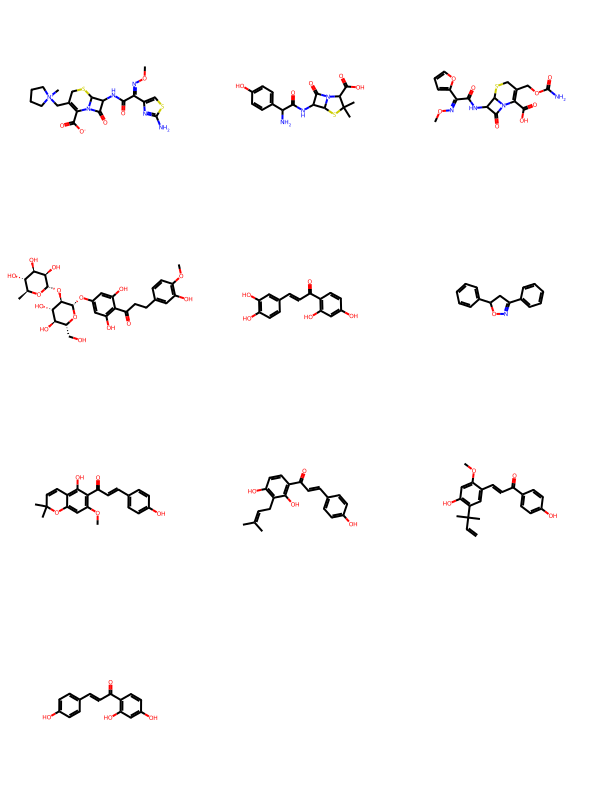

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw

antiTBC = ['C[N+]1(CCCC1)CC2=C(N3C(C(C3=O)NC(=O)C(=NOC)C4=CSC(=N4)N)SC2)C(=O)[O-]','CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C(=O)O)C',
           'CON=C(C1=CC=CO1)C(=O)NC2C3N(C2=O)C(=C(CS3)COC(=O)N)C(=O)O','C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@@H]2[C@H]([C@@H]([C@H](O[C@H]2OC3=CC(=C(C(=C3)O)C(=O)CCC4=CC(=C(C=C4)OC)O)O)CO)O)O)O)O)O',
           'C1=CC(=C(C=C1C=CC(=O)C2=C(C=C(C=C2)O)O)O)O','C1C(ON=C1C2=CC=CC=C2)C3=CC=CC=C3','CC1(C=CC2=C(C(=C(C=C2O1)OC)C(=O)C=CC3=CC=C(C=C3)O)O)C',
           'CC(=CCC1=C(C=CC(=C1O)C(=O)C=CC2=CC=C(C=C2)O)O)C','CC(C)(C=C)C1=C(C=C(C(=C1)C=CC(=O)C2=CC=C(C=C2)O)OC)O','C1=CC(=CC=C1C=CC(=O)C2=C(C=C(C=C2)O)O)O']
mol_lista = []

for i in antiTBC:
  mol = Chem.MolFromSmiles(i)
  mol_lista.append(mol)
Draw.MolsToGridImage(mol_lista)

## Pregunta 5: Método científico (4 puntos)

Leer el artículo disponibilizado por el profesor y explica cómo es aplicado el método científico. Emplea como máximo 300 palabras.


El método científico es una aproximación sistemática y empírica utilizada para investigar fenómenos naturales, formular preguntas, y obtener conocimiento confiable sobre el mundo. Comienza con la observación de un fenómeno y la formulación de una pregunta. A partir de esta pregunta, se establece una hipótesis que es una explicación tentativa del fenómeno. Luego, se diseñan experimentos controlados para recopilar datos que respalden o refuten la hipótesis. Los datos se analizan estadísticamente y se llega a conclusiones.

Los resultados y conclusiones se presentan en informes científicos revisados por pares y, si es posible, se replican para verificar la validez de los resultados. Este proceso iterativo de observación, formulación de hipótesis, experimentación y análisis de datos contribuye al desarrollo del conocimiento científico. La objetividad, la reproducibilidad y la verificabilidad son elementos clave del método científico que aseguran la fiabilidad de los resultados y la construcción gradual de la comprensión científica.